In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2018-11-21 16:41:23,509 [24156] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
def build_df():
    filepath = os.path.join(DIRNAME_BIG, FILENAME_BIG)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--batch-size', '--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel', '--stacked-kernel', '--sumed-kernel', '--svhn',
       '--tensorboard', '--validation-size',
       'deepfriedconvnet', 'deepstrom','dense', "--gamma", "--nb-stack", 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-fastfood", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)

    return df

DIRNAME_BIG = "/home/luc/Resultats/Deepstrom/november_2018/end_to_end_with_augment"
FILENAME_BIG = "gathered_results.csv"
df = build_df()

In [3]:
def get_sorted_acc_for_dataset(df_, dataset):
    df_dataset = df_[df_.dataset == dataset]
    df_dataset = df_dataset.sort_values(by="test_acc", ascending=False)
    return df_dataset

In [4]:
get_sorted_acc_for_dataset(df, "mnist")

--nys-size --out-dim dataset    kernel           network            test_acc        test_eval_time       training_time             val_acc        val_eval_time  file_timestamp
5        None      None   mnist      None  deepfriedconvnet                None                  None                None                None                 None      1542128021
6        None      None   mnist      None  deepfriedconvnet                None                  None                None                None                 None      1542128036
28       None      None   mnist      None  deepfriedconvnet                None                  None                None                None                 None      1542128029
39       None      1024   mnist      None             dense  0.9822000086307525    0.0282437801361084  11942.309963703156  0.9835000038146973  0.05691170692443848      1542093243
19       None       128   mnist      None             dense  0.9712999999523163   0.04774975776672363  18801.122860193253  0.9713999986648559  0.09031915664672852      1542093242
38       None        64   mnist      None             dense  0.9674999952316284   0.05219531059265137   18916.09988093376  0.9656000018119812  0.10185027122497559      1542093242
11       None        16   mnist      None             dense  0.9584999918937683   0.07531499862670898  18834.147827863693  0.9583999991416932  0.07740616798400879      1542093237
32         64      None   mnist  chi2_cpd         deepstrom  0.9003000020980835   0.10981917381286621  10661.762295007706  0.8931000113487244  0.13260126113891602      1542138607
26        128      None   mnist  chi2_cpd         deepstrom  0.8997999966144562   0.10766291618347168  12511.990970373154  0.8817000031471253  0.11288857460021973      1542142166
37        256      None   mnist  chi2_cpd         deepstrom  0.8875000059604645    0.1719503402709961   24715.69637322426  0.8808999955654144   0.2258143424987793      1542143626
12         16      None   mnist  chi2_cpd         deepstrom  0.8655000030994415  0.060543060302734375    10251.9246032238  0.8617999970912933   0.1010580062866211      1542138349
31        512      None   mnist  chi2_cpd         deepstrom  0.8584999978542328    0.3059966564178467  27894.391397476196   0.857099997997284  0.30718469619750977      1542143762
29          8      None   mnist  chi2_cpd         deepstrom  0.8299999952316284  0.054628849029541016  10385.974974393845  0.8270999968051911  0.09607958793640137      1542128211
9           4      None   mnist  chi2_cpd         deepstrom  0.7988000035285949   0.05095171928405762  10202.119398117065  0.8037999987602233  0.09100127220153809      1542128137

In [5]:
get_sorted_acc_for_dataset(df, "cifar10")

--nys-size --out-dim  dataset    kernel           network            test_acc      test_eval_time       training_time             val_acc       val_eval_time  file_timestamp
4        None      None  cifar10      None  deepfriedconvnet                None                None                None                None                None      1542128044
20       None      None  cifar10      None  deepfriedconvnet                None                None                None                None                None      1542128054
24       None      None  cifar10      None  deepfriedconvnet                None                None                None                None                None      1542128066
34         16      None  cifar10  chi2_cpd         deepstrom  0.8763999938964844   1.166285514831543   36617.78374505043  0.8763000011444092   1.849858283996582      1542146397
3        None        16  cifar10      None             dense  0.8750999987125396   3.556856632232666    51417.4389526844  0.8725000023841858   5.722635269165039      1542093242
17        128      None  cifar10  chi2_cpd         deepstrom  0.8719999969005585   4.408368825912476   55802.59868788719  0.8729000091552734   6.515403985977173      1542149279
14       None        64  cifar10      None             dense  0.8715999960899353    3.90252685546875   51397.38422727585  0.8755999982357026   6.284409046173096      1542093242
18       None      1024  cifar10      None             dense  0.8707000076770782   3.899188756942749   34750.86156606674  0.8687999963760376   6.288317680358887      1542093242
10          8      None  cifar10  chi2_cpd         deepstrom  0.8703999996185303  3.6414413452148438   57386.47595191002  0.8709000051021576   5.832661390304565      1542144697
40       None       128  cifar10      None             dense  0.8699000000953674   3.515281915664673   34945.89453077316  0.8782000064849853   5.652684450149536      1542093242
8           4      None  cifar10  chi2_cpd         deepstrom  0.8697000086307526  3.9117791652679443   56443.23889231682  0.8759000062942505   6.313701391220093      1542144666
36        512      None  cifar10  chi2_cpd         deepstrom  0.8689000010490417   2.193476676940918   85243.51559782028  0.8681999981403351  2.8480000495910645      1542156968
30        256      None  cifar10  chi2_cpd         deepstrom  0.8680999994277954   1.638434648513794  44774.475116968155  0.8678999960422515   2.325268268585205      1542154705
27         64      None  cifar10  chi2_cpd         deepstrom  0.8679000020027161   4.357625722885132   47625.56103491783  0.8693000018596649     6.8435378074646      1542148610

In [6]:
get_sorted_acc_for_dataset(df, "svhn")

--nys-size --out-dim dataset    kernel           network            test_acc      test_eval_time       training_time             val_acc       val_eval_time  file_timestamp
2        None      None    svhn      None  deepfriedconvnet                None                None                None                None                None      1542128113
22       None      None    svhn      None  deepfriedconvnet                None                None                None                None                None      1542128100
23       None      None    svhn      None  deepfriedconvnet                None                None                None                None                None      1542128076
33          8      None    svhn  chi2_cpd         deepstrom   0.950157399530764   3.156935930252075  157795.88800406456  0.9431999981403351   1.888800859451294      1542171673
1        None       128    svhn      None             dense  0.9500648246871101   9.564645528793335  118978.64107084274  0.9454999923706054   5.882847309112549      1542112081
21        256      None    svhn  chi2_cpd         deepstrom  0.9472685147214819  14.435875177383423  129790.18364858627   0.940499997138977   7.935451030731201      1542196274
7        None      1024    svhn      None             dense  0.9470370301493892  10.098342180252075  119093.35198688507  0.9433000087738037  6.1705663204193115      1542112171
41         64      None    svhn  chi2_cpd         deepstrom  0.9463981500378361  3.4341957569122314   78279.07663154602  0.9418999910354614  1.9714641571044922      1542177149
15        128      None    svhn  chi2_cpd         deepstrom  0.9461481416666949     3.6263587474823   83843.22896647453  0.9402000069618225  2.0779218673706055      1542183046
0        None        64    svhn      None             dense  0.9458981443334509   10.34985876083374  114540.45786070824  0.9479000031948089   6.307359933853149      1542112063
25       None        16    svhn      None             dense  0.9455648152916519  2.8233609199523926    71913.0057694912   0.943999993801117  1.6415505409240723      1542105209
13          4      None    svhn  chi2_cpd         deepstrom  0.9449722214981362   3.056546449661255  157415.13459396362   0.941399997472763   1.819403886795044      1542168358
16         16      None    svhn  chi2_cpd         deepstrom  0.9448888897895813  3.1488840579986572  161223.36014437675  0.9398000001907348   1.856621503829956      1542173177
35        512      None    svhn  chi2_cpd         deepstrom  0.9432222269199513   16.69476819038391  219266.66595840454  0.9396999895572662    8.49440312385559      1542196669

In [7]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
kernel_names.remove("None")
repr_dim = set(df["--out-dim"].values)
repr_dim.remove("None")  # dtype: str
nys_size = set(df["--nys-size"].values)
nys_size.remove("None")
datasets = set(df["dataset"])

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))
logger.debug("Tested representation dimension are: {}".format(repr_dim))

2018-11-21 16:41:23,643 [24156] DEBUG    root: Nystrom possible sizes are: {'128', '512', '8', '256', '64', '4', '16'}
2018-11-21 16:41:23,644 [24156] DEBUG    root: Kernel functions are: {'chi2_cpd'}
2018-11-21 16:41:23,646 [24156] DEBUG    root: Compared network types are: {'deepstrom', 'dense', 'deepfriedconvnet'}
2018-11-21 16:41:23,647 [24156] DEBUG    root: Tested representation dimension are: {'128', '64', '1024', '16'}


In [8]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [9]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2018-11-21 16:41:23,741 [24156] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-11-21 16:41:23,766 [24156] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-11-21 16:41:23,772 [24156] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2018-11-21 16:41:23,778 [24156] DEBUG    matplotlib.font

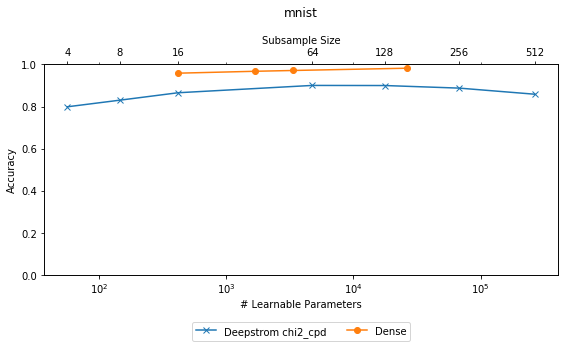

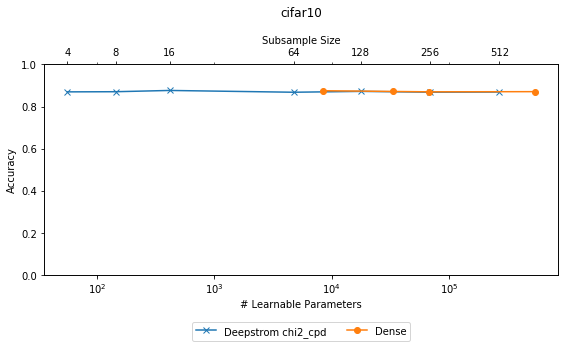

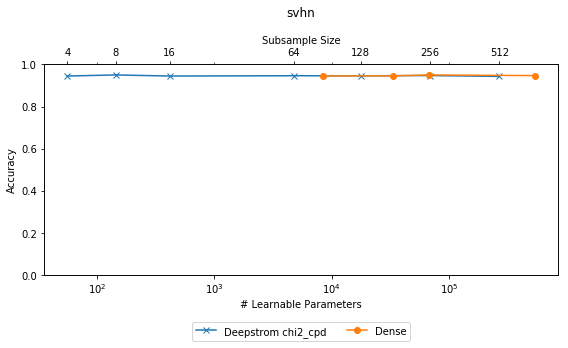

In [10]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        accuracies_kernel = df_kernel["test_acc"]
        subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
        np_param = (np.square(subsample_sizes_kernel) +  # m x m
                    subsample_sizes_kernel * nb_classes_dataset)  # m x c
        sorted_idx = np.argsort(np_param.values)
        xx = np_param.values[sorted_idx]
        yy = accuracies_kernel.values[sorted_idx].astype(float)
        ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
    
    df_dense = df_data[df_data["network"] == "dense"]
    accuracies_dense = df_dense["test_acc"]
    out_dim_dense = df_dense["--out-dim"].astype(int)
    np_param_dense = (nb_feature_conv * out_dim_dense +  # d x D
                out_dim_dense * nb_classes_dataset)  # D x c
    sorted_idx_dense = np.argsort(np_param_dense.values)
    xx = np_param_dense.values[sorted_idx_dense]
    yy = accuracies_dense.values[sorted_idx_dense].astype(float)
    ax.plot(xx, yy, marker="o", label=f"Dense")
    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)